# Calidad del aire

Datos: Calidad del aire de la OMS. 

Objetivo: Analizar la relación entre la densidad poblacional y los niveles de contaminación del aire.

In [152]:
# Importar librerias
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
df = pd.read_excel("ambient_air_quality.xlsx")  

# Mostrar las primeras filas del dataset
df.head(5)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,71.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,98.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,97.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1


In [58]:
# Ver información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          40098 non-null  object 
 1   iso3                40098 non-null  object 
 2   country_name        40098 non-null  object 
 3   city                40098 non-null  object 
 4   year                40095 non-null  float64
 5   version             40098 non-null  object 
 6   pm10_concentration  28672 non-null  float64
 7   pm25_concentration  40098 non-null  float64
 8   no2_concentration   40098 non-null  float64
 9   pm10_tempcov        22403 non-null  float64
 10  pm25_tempcov        16590 non-null  float64
 11  no2_tempcov         23402 non-null  float64
 12  type_of_stations    23331 non-null  object 
 13  reference           6652 non-null   object 
 14  web_link            1790 non-null   object 
 15  population          22433 non-null  float64
 16  popu

In [60]:
# Ver valores nulos en cada columna
df.isnull().sum()

who_region                0
iso3                      0
country_name              0
city                      0
year                      3
version                   0
pm10_concentration    11426
pm25_concentration        0
no2_concentration         0
pm10_tempcov          17695
pm25_tempcov          23508
no2_tempcov           16696
type_of_stations      16767
reference             33446
web_link              38308
population            17665
population_source     21996
latitude                  0
longitude                 0
who_ms                    0
dtype: int64

In [125]:
# Eliminar filas con datos nulos en las columnas clave
df_clean = df.dropna(subset=["pm25_concentration", "pm10_concentration", "no2_concentration", "population"])


In [154]:
# Calcular la contaminación promedio
df_clean["avg_pollution"] = df_clean[["pm25_concentration", "pm10_concentration", "no2_concentration"]].mean(axis=1)


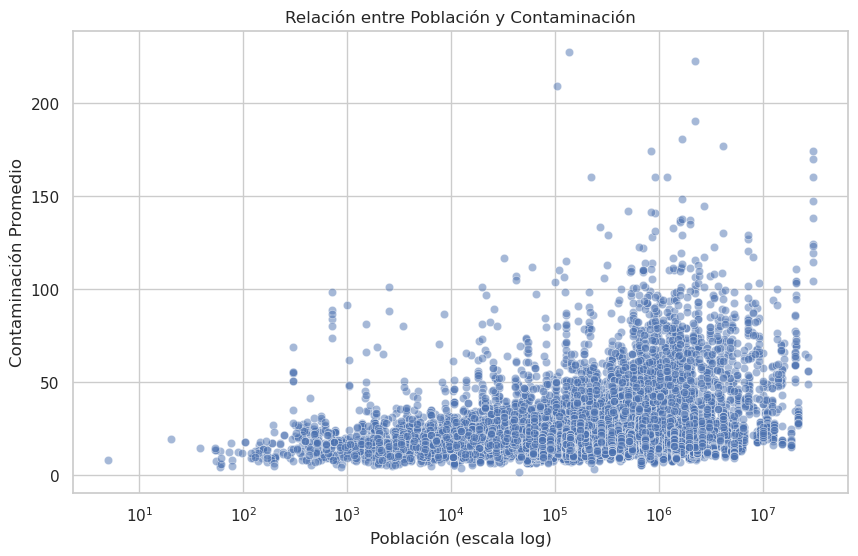

In [156]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="population", y="avg_pollution", alpha=0.5)

# Configuración del gráfico
plt.xscale("log")  # Escala logarítmica para mejorar la visualización
plt.xlabel("Población (escala log)")
plt.ylabel("Contaminación Promedio")
plt.title("Relación entre Población y Contaminación")
plt.grid(True)

# Mostrar gráfico
plt.show()

**Tendencia creciente:** A medida que la población aumenta, la contaminación promedio tiende a incrementarse. Esto sugiere que las ciudades más pobladas tienen, en general, mayores niveles de contaminación.

**Alta dispersión:** Aunque hay una correlación positiva, también hay una gran variabilidad en los datos. Esto indica que no todas las ciudades con alta población tienen necesariamente una contaminación elevada, lo que puede deberse a diferencias en políticas ambientales, infraestructuras o fuentes de contaminación.

**Puntos atípicos:** Se observan algunos valores altos de contaminación en ciudades de menor población, lo que sugiere que ciertos lugares pueden tener fuentes de contaminación específicas que no dependen solo de la densidad poblacional.